In [1]:
import deepchem as dc
from deepchem.feat.graph_data import GraphData
from deepchem.feat import MolGraphConvFeaturizer
import numpy as np
import pandas as pd

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (C:\Users\yyyyx\miniconda3\envs\deepchem\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
df = pd.read_csv('./TDC_dataset/CYP2C19.csv')

In [3]:
df

,Unnamed: 0,Drug_ID,Drug,Y
0,0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0
1,1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
2,2,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
3,3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
4,4,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
...,...,...,...,...
12660,12660,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
12661,12661,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
12662,12662,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...,1
12663,12663,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [4]:
# 1. Y값이 1인 데이터 선택
df_positive = df[df['Y'] == 1]

In [5]:
df_positive

,Unnamed: 0,Drug_ID,Drug,Y
1,1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
2,2,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
3,3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
4,4,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
7,7,6602688.0,Br.N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c...,1
...,...,...,...,...
12447,12447,14947879.0,O=C1C[C@H](c2ccccc2)[C@@H](c2ccc(Br)cc2)O1,1
12464,12464,16758581.0,Cc1ccc(S(=O)(=O)N[C@@H](CCc2ccccc2)CC(=O)C(C)(...,1
12498,12498,16758628.0,CC(C)CO/N=C1/C[C@@H](O)[C@@H](O)[C@H]2[C@@H]1C...,1
12577,12577,16758720.0,C#CCCCO/N=C1/C[C@@H](O)[C@@H](O)[C@@H]2[C@@H]3...,1


In [6]:
# 1. SMILES에서 그래프 형식으로 변환
featurizer = MolGraphConvFeaturizer()
features = featurizer.featurize(df["Drug"])  # Smiles 컬럼에서 특징 추출

In [7]:
features

array([GraphData(node_features=[22, 30], edge_index=[2, 44], edge_features=None),
       GraphData(node_features=[22, 30], edge_index=[2, 48], edge_features=None),
       GraphData(node_features=[18, 30], edge_index=[2, 40], edge_features=None),
       ...,
       GraphData(node_features=[24, 30], edge_index=[2, 56], edge_features=None),
       GraphData(node_features=[26, 30], edge_index=[2, 58], edge_features=None),
       GraphData(node_features=[17, 30], edge_index=[2, 34], edge_features=None)],
      dtype=object)

In [8]:
# 2. 레이블 설정 (pIC50)
labels = df["Y"].values

In [9]:
# 3. 가중치 (필요시 기본값으로 1 설정)
weights = None  # 기본적으로 None으로 설정. 커스텀 가중치가 있으면 지정.

# 4. 데이터셋 생성
dataset = dc.data.NumpyDataset(X=features, y=labels, w=weights)

In [10]:
dataset

<NumpyDataset X.shape: (12665,), y.shape: (12665,), w.shape: (12665,), task_names: [0]>

In [11]:
# 데이터셋 확인
print(f"Number of samples in dataset: {len(dataset)}")
print(f"Feature shape: {dataset.X[0].node_features.shape[0]} nodes, {dataset.X[0].edge_index.shape[1]} edges")
print(f"First label: {dataset.y[0]}")

Number of samples in dataset: 12665
Feature shape: 22 nodes, 44 edges
First label: 0


In [12]:
# 데이터셋을 Train/Validation/Test로 나누기
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)

# 확인
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 10132
Validation dataset size: 1266
Test dataset size: 1267


In [13]:
metric_list = [
    dc.metrics.Metric(dc.metrics.roc_auc_score, name='roc_auc_score'),
    dc.metrics.Metric(dc.metrics.accuracy_score, name='accuracy_score'),
    #dc.metrics.Metric(dc.metrics.precision_score, name='precision_score', average='binary'),
    #dc.metrics.Metric(dc.metrics.recall_score, name='recall_score', average='binary'),
    #dc.metrics.Metric(dc.metrics.f1_score, name='f1_score', average='binary'),
    #dc.metrics.Metric(dc.metrics.matthews_corrcoef, name='mcc_score')
]

In [14]:
import pandas as pd
import deepchem as dc
from itertools import product
from tqdm import tqdm

# 하이퍼파라미터 설정
param_grid = {
    'graph_conv_layers': [[64, 64], [128, 128], [64, 128, 64]],
    'dense_layer_size': [128, 256],
    'dropout': [0.2, 0.3],
    'learning_rate': [1e-3, 5e-4, 1e-4]
}

# 하이퍼파라미터 조합 생성
combinations = list(product(
    param_grid['graph_conv_layers'],
    param_grid['dense_layer_size'],
    param_grid['dropout'],
    param_grid['learning_rate']
))

# 결과 저장 리스트 초기화
results = []

# 데이터셋과 평가 지표가 준비되었다고 가정
# train_dataset, test: DeepChem의 NumpyDataset 형식
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# 그리드 서치 진행
for idx, (graph_conv_layers, dense_layer_size, dropout, learning_rate) in enumerate(
    tqdm(combinations, desc="Grid Search Progress")):
    
    print(f"\nRunning combination {idx + 1}/{len(combinations)}:")
    print(f"graph_conv_layers: {graph_conv_layers}, dense_layer_size: {dense_layer_size}, "
          f"dropout: {dropout}, learning_rate: {learning_rate}")
    
    try:
        # 모델 생성
        model = dc.models.GCNModel(
            n_tasks=1,
            graph_conv_layers=graph_conv_layers,
            dense_layer_size=dense_layer_size,
            dropout=dropout,
            mode='classification',
            learning_rate=learning_rate,
            batch_size=128
        )
        
        # 모델 학습
        model.fit(train_dataset, nb_epoch=10)
        
        # 모델 평가 (train, test 각각)
        train_scores = model.evaluate(train_dataset, metric_list)
        test_scores = model.evaluate(test_dataset, metric_list)
        
        # 결과 저장용 딕셔너리 생성
        result_dict = {
            'graph_conv_layers': graph_conv_layers,
            'dense_layer_size': dense_layer_size,
            'dropout': dropout,
            'learning_rate': learning_rate,
            'batch_size': 128
        }
        
        # train 스코어 (roc_auc, accuracy, precision 등)
        for metric_name, metric_value in train_scores.items():
            result_dict[f'train_{metric_name}'] = metric_value
        
        # test 스코어 (roc_auc, accuracy, precision 등)
        for metric_name, metric_value in test_scores.items():
            result_dict[f'test_{metric_name}'] = metric_value
        
        results.append(result_dict)
        
        # 로그 표시
        print("Train Scores:", train_scores)
        print("Test Scores:", test_scores)
        
    except Exception as e:
        print(f"Error during training for combination {idx + 1}: {e}")

# 모든 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

Grid Search Progress:   0%|                                                                     | 0/36 [00:00<?, ?it/s]


Running combination 1/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:   3%|█▋                                                           | 1/36 [01:01<35:57, 61.65s/it]

Train Scores: {'roc_auc_score': 0.8676796419638856, 'accuracy_score': 0.7419068298460324}
Test Scores: {'roc_auc_score': 0.8548503502974889, 'accuracy_score': 0.739542225730071}

Running combination 2/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:   6%|███▍                                                         | 2/36 [02:02<34:39, 61.16s/it]

Train Scores: {'roc_auc_score': 0.8713945354406469, 'accuracy_score': 0.797769443347809}
Test Scores: {'roc_auc_score': 0.8647205415654502, 'accuracy_score': 0.7955801104972375}

Running combination 3/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:   8%|█████                                                        | 3/36 [03:05<34:04, 61.95s/it]

Train Scores: {'roc_auc_score': 0.8308353423913597, 'accuracy_score': 0.7348993288590604}
Test Scores: {'roc_auc_score': 0.8221290945576896, 'accuracy_score': 0.7158642462509865}

Running combination 4/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  11%|██████▊                                                      | 4/36 [04:06<32:51, 61.61s/it]

Train Scores: {'roc_auc_score': 0.867989446951843, 'accuracy_score': 0.7474338728780102}
Test Scores: {'roc_auc_score': 0.8546265421388012, 'accuracy_score': 0.7458563535911602}

Running combination 5/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  14%|████████▍                                                    | 5/36 [05:07<31:39, 61.28s/it]

Train Scores: {'roc_auc_score': 0.8562308462607584, 'accuracy_score': 0.7766482431898935}
Test Scores: {'roc_auc_score': 0.8486792803939024, 'accuracy_score': 0.771112865035517}

Running combination 6/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  17%|██████████▏                                                  | 6/36 [06:08<30:34, 61.15s/it]

Train Scores: {'roc_auc_score': 0.7707156347093027, 'accuracy_score': 0.6968022108172128}
Test Scores: {'roc_auc_score': 0.7680479905044988, 'accuracy_score': 0.7095501183898973}

Running combination 7/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  19%|███████████▊                                                 | 7/36 [07:08<29:30, 61.04s/it]

Train Scores: {'roc_auc_score': 0.8723382237415724, 'accuracy_score': 0.7416107382550335}
Test Scores: {'roc_auc_score': 0.8632142372165307, 'accuracy_score': 0.7292817679558011}

Running combination 8/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  22%|█████████████▌                                               | 8/36 [08:09<28:26, 60.94s/it]

Train Scores: {'roc_auc_score': 0.8666588285936044, 'accuracy_score': 0.7748716936439005}
Test Scores: {'roc_auc_score': 0.8629677967721331, 'accuracy_score': 0.7758484609313339}

Running combination 9/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  25%|███████████████▎                                             | 9/36 [09:10<27:25, 60.93s/it]

Train Scores: {'roc_auc_score': 0.8419809547577397, 'accuracy_score': 0.753750493485985}
Test Scores: {'roc_auc_score': 0.8356129074440102, 'accuracy_score': 0.745067087608524}

Running combination 10/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  28%|████████████████▋                                           | 10/36 [10:10<26:19, 60.77s/it]

Train Scores: {'roc_auc_score': 0.8510564427587192, 'accuracy_score': 0.7484208448480063}
Test Scores: {'roc_auc_score': 0.8402474966177307, 'accuracy_score': 0.7490134175217048}

Running combination 11/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  31%|██████████████████▎                                         | 11/36 [11:11<25:20, 60.83s/it]

Train Scores: {'roc_auc_score': 0.8286582611916696, 'accuracy_score': 0.7366758784050533}
Test Scores: {'roc_auc_score': 0.8199765127168299, 'accuracy_score': 0.728492501973165}

Running combination 12/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  33%|████████████████████                                        | 12/36 [12:12<24:18, 60.78s/it]

Train Scores: {'roc_auc_score': 0.8222244981082678, 'accuracy_score': 0.7331227793130675}
Test Scores: {'roc_auc_score': 0.8157040401144691, 'accuracy_score': 0.7300710339384373}

Running combination 13/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  36%|█████████████████████▋                                      | 13/36 [13:13<23:19, 60.83s/it]

Train Scores: {'roc_auc_score': 0.8886779574158178, 'accuracy_score': 0.7844453217528622}
Test Scores: {'roc_auc_score': 0.8729989287384765, 'accuracy_score': 0.7671665351223362}

Running combination 14/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  39%|███████████████████████▎                                    | 14/36 [14:14<22:22, 61.02s/it]

Train Scores: {'roc_auc_score': 0.8786918991798178, 'accuracy_score': 0.7269048559020924}
Test Scores: {'roc_auc_score': 0.8652134224542449, 'accuracy_score': 0.7103393843725335}

Running combination 15/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  42%|█████████████████████████                                   | 15/36 [15:16<21:23, 61.11s/it]

Train Scores: {'roc_auc_score': 0.8360531741154847, 'accuracy_score': 0.7268061587050928}
Test Scores: {'roc_auc_score': 0.8268642716678989, 'accuracy_score': 0.7205998421468035}

Running combination 16/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  44%|██████████████████████████▋                                 | 16/36 [16:17<20:22, 61.11s/it]

Train Scores: {'roc_auc_score': 0.8800639249302911, 'accuracy_score': 0.6900908014212397}
Test Scores: {'roc_auc_score': 0.8628822970261176, 'accuracy_score': 0.6803472770323599}

Running combination 17/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  47%|████████████████████████████▎                               | 17/36 [17:18<19:22, 61.18s/it]

Train Scores: {'roc_auc_score': 0.8711584220732693, 'accuracy_score': 0.7693446506119226}
Test Scores: {'roc_auc_score': 0.8587104123602456, 'accuracy_score': 0.7592738752959748}

Running combination 18/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  50%|██████████████████████████████                              | 18/36 [18:19<18:20, 61.14s/it]

Train Scores: {'roc_auc_score': 0.8280683162131768, 'accuracy_score': 0.7479273588630083}
Test Scores: {'roc_auc_score': 0.8206655400817779, 'accuracy_score': 0.739542225730071}

Running combination 19/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  53%|███████████████████████████████▋                            | 19/36 [19:20<17:19, 61.14s/it]

Train Scores: {'roc_auc_score': 0.8856041280648925, 'accuracy_score': 0.8078365574417686}
Test Scores: {'roc_auc_score': 0.8730366492146597, 'accuracy_score': 0.8074191002367798}

Running combination 20/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  56%|█████████████████████████████████▎                          | 20/36 [20:21<16:15, 61.00s/it]

Train Scores: {'roc_auc_score': 0.8781862797032559, 'accuracy_score': 0.7166403474141334}
Test Scores: {'roc_auc_score': 0.8679619878188009, 'accuracy_score': 0.7158642462509865}

Running combination 21/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  58%|███████████████████████████████████                         | 21/36 [21:22<15:15, 61.03s/it]

Train Scores: {'roc_auc_score': 0.8468337912573015, 'accuracy_score': 0.7708251085669167}
Test Scores: {'roc_auc_score': 0.8389599710306743, 'accuracy_score': 0.7655880031570639}

Running combination 22/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  61%|████████████████████████████████████▋                       | 22/36 [22:24<14:15, 61.13s/it]

Train Scores: {'roc_auc_score': 0.8802159678519323, 'accuracy_score': 0.6878207658902488}
Test Scores: {'roc_auc_score': 0.8653894513431004, 'accuracy_score': 0.6882399368587214}

Running combination 23/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  64%|██████████████████████████████████████▎                     | 23/36 [23:25<13:14, 61.14s/it]

Train Scores: {'roc_auc_score': 0.8635404036480099, 'accuracy_score': 0.738255033557047}
Test Scores: {'roc_auc_score': 0.84881255940975, 'accuracy_score': 0.728492501973165}

Running combination 24/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  67%|████████████████████████████████████████                    | 24/36 [24:26<12:14, 61.22s/it]

Train Scores: {'roc_auc_score': 0.8396104330540272, 'accuracy_score': 0.757007500986972}
Test Scores: {'roc_auc_score': 0.8299410051752494, 'accuracy_score': 0.755327545382794}

Running combination 25/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  69%|█████████████████████████████████████████▋                  | 25/36 [25:28<11:14, 61.35s/it]

Train Scores: {'roc_auc_score': 0.8692850048931551, 'accuracy_score': 0.7947098302408212}
Test Scores: {'roc_auc_score': 0.8602670106774095, 'accuracy_score': 0.7868981846882399}

Running combination 26/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  72%|███████████████████████████████████████████▎                | 26/36 [26:32<10:21, 62.17s/it]

Train Scores: {'roc_auc_score': 0.8440522464957241, 'accuracy_score': 0.7368732727990525}
Test Scores: {'roc_auc_score': 0.8286170164612159, 'accuracy_score': 0.7253354380426204}

Running combination 27/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  75%|█████████████████████████████████████████████               | 27/36 [27:36<09:25, 62.80s/it]

Train Scores: {'roc_auc_score': 0.8039276986318785, 'accuracy_score': 0.7346032372680615}
Test Scores: {'roc_auc_score': 0.7967532728799835, 'accuracy_score': 0.7237569060773481}

Running combination 28/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  78%|██████████████████████████████████████████████▋             | 28/36 [28:39<08:21, 62.74s/it]

Train Scores: {'roc_auc_score': 0.8653180276072825, 'accuracy_score': 0.7897749703908409}
Test Scores: {'roc_auc_score': 0.8560272291544075, 'accuracy_score': 0.7750591949486977}

Running combination 29/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  81%|████████████████████████████████████████████████▎           | 29/36 [29:42<07:20, 62.99s/it]

Train Scores: {'roc_auc_score': 0.8534343022329581, 'accuracy_score': 0.7699368337939203}
Test Scores: {'roc_auc_score': 0.8436272512837535, 'accuracy_score': 0.7663772691397001}

Running combination 30/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  83%|██████████████████████████████████████████████████          | 30/36 [30:46<06:18, 63.10s/it]

Train Scores: {'roc_auc_score': 0.7854457283580896, 'accuracy_score': 0.7125937623371497}
Test Scores: {'roc_auc_score': 0.7794446037086772, 'accuracy_score': 0.7119179163378059}

Running combination 31/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  86%|███████████████████████████████████████████████████▋        | 31/36 [31:49<05:15, 63.14s/it]

Train Scores: {'roc_auc_score': 0.8697571040998124, 'accuracy_score': 0.7974733517568101}
Test Scores: {'roc_auc_score': 0.8617330798517333, 'accuracy_score': 0.7861089187056038}

Running combination 32/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  89%|█████████████████████████████████████████████████████▎      | 32/36 [32:53<04:13, 63.30s/it]

Train Scores: {'roc_auc_score': 0.8603024162061921, 'accuracy_score': 0.7853335965258587}
Test Scores: {'roc_auc_score': 0.8477312390924956, 'accuracy_score': 0.7790055248618785}

Running combination 33/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  92%|███████████████████████████████████████████████████████     | 33/36 [33:59<03:12, 64.16s/it]

Train Scores: {'roc_auc_score': 0.8045701949963469, 'accuracy_score': 0.7321358073430715}
Test Scores: {'roc_auc_score': 0.7928454315473945, 'accuracy_score': 0.7221783741120757}

Running combination 34/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  94%|████████████████████████████████████████████████████████▋   | 34/36 [35:04<02:09, 64.57s/it]

Train Scores: {'roc_auc_score': 0.8713998033320541, 'accuracy_score': 0.7934267666798263}
Test Scores: {'roc_auc_score': 0.8602116873123407, 'accuracy_score': 0.7821625887924231}

Running combination 35/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  97%|██████████████████████████████████████████████████████████▎ | 35/36 [36:08<01:04, 64.27s/it]

Train Scores: {'roc_auc_score': 0.8464005586907848, 'accuracy_score': 0.6664034741413344}
Test Scores: {'roc_auc_score': 0.8347654540790923, 'accuracy_score': 0.6661404893449092}

Running combination 36/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress: 100%|████████████████████████████████████████████████████████████| 36/36 [37:13<00:00, 62.03s/it]

Train Scores: {'roc_auc_score': 0.7717705177012923, 'accuracy_score': 0.6598894591393605}
Test Scores: {'roc_auc_score': 0.760026102569519, 'accuracy_score': 0.6393054459352802}


In [17]:
results_df

,graph_conv_layers,dense_layer_size,dropout,learning_rate,batch_size,train_roc_auc_score,train_accuracy_score,test_roc_auc_score,test_accuracy_score
0,"[64, 64]",128,0.2,0.0010,128,0.911877,0.793402,0.904217,0.780604
1,"[64, 64]",128,0.2,0.0005,128,0.891730,0.632813,0.885294,0.622417
2,"[64, 64]",128,0.2,0.0001,128,0.855408,0.704661,0.857043,0.702703
3,"[64, 64]",128,0.3,0.0010,128,0.894677,0.812382,0.895334,0.806041
4,"[64, 64]",128,0.3,0.0005,128,0.863612,0.701580,0.859762,0.686804
5,"[64, 64]",128,0.3,0.0001,128,0.859923,0.772533,0.866630,0.776630
6,"[64, 64]",256,0.2,0.0010,128,0.919901,0.747988,0.912778,0.740064
7,"[64, 64]",256,0.2,0.0005,128,0.895593,0.684587,0.898158,0.683625
8,"[64, 64]",256,0.2,0.0001,128,0.876829,0.709530,0.874443,0.713831
9,"[64, 64]",256,0.3,0.0010,128,0.898943,0.725529,0.897797,0.713831


In [15]:
# 유효성 점수 기준으로 정렬
results_df = results_df.sort_values(by='test_accuracy_score', ascending=False)

# 결과 저장
results_df.to_csv("./Gridsearch_result/gridsearch_results_CYP2C19_inhivitor.csv", index=False)

# 상위 결과 출력
print("\nTop Results:")
print(results_df.head())


Top Results:
   graph_conv_layers  dense_layer_size  dropout  learning_rate  batch_size  \
18        [128, 128]               256      0.2         0.0010         128   
1           [64, 64]               128      0.2         0.0005         128   
24     [64, 128, 64]               128      0.2         0.0010         128   
30     [64, 128, 64]               256      0.2         0.0010         128   
33     [64, 128, 64]               256      0.3         0.0010         128   

    train_roc_auc_score  train_accuracy_score  test_roc_auc_score  \
18             0.885604              0.807837            0.873037   
1              0.871395              0.797769            0.864721   
24             0.869285              0.794710            0.860267   
30             0.869757              0.797473            0.861733   
33             0.871400              0.793427            0.860212   

    test_accuracy_score  
18             0.807419  
1              0.795580  
24             0.786898 

In [16]:
# test_accuracy_score 순
results_df.head(10)

,graph_conv_layers,dense_layer_size,dropout,learning_rate,batch_size,train_roc_auc_score,train_accuracy_score,test_roc_auc_score,test_accuracy_score
18,"[128, 128]",256,0.2,0.0010,128,0.885604,0.807837,0.873037,0.807419
1,"[64, 64]",128,0.2,0.0005,128,0.871395,0.797769,0.864721,0.795580
24,"[64, 128, 64]",128,0.2,0.0010,128,0.869285,0.794710,0.860267,0.786898
30,"[64, 128, 64]",256,0.2,0.0010,128,0.869757,0.797473,0.861733,0.786109
33,"[64, 128, 64]",256,0.3,0.0010,128,0.871400,0.793427,0.860212,0.782163
31,"[64, 128, 64]",256,0.2,0.0005,128,0.860302,0.785334,0.847731,0.779006
7,"[64, 64]",256,0.2,0.0005,128,0.866659,0.774872,0.862968,0.775848
27,"[64, 128, 64]",128,0.3,0.0010,128,0.865318,0.789775,0.856027,0.775059
4,"[64, 64]",128,0.3,0.0005,128,0.856231,0.776648,0.848679,0.771113
12,"[128, 128]",128,0.2,0.0010,128,0.888678,0.784445,0.872999,0.767167


In [20]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [17]:
# test_accuracy_score 1등
model_1st = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[128,128],
    dense_layer_size=256,
    dropout=0.2,
    mode='classification',
    learning_rate=0.001,
    batch_size=128,
)
# test_accuracy_score 2등
model_2nd = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[64,64],
    dense_layer_size=128,
    dropout=0.2,
    mode='classification',
    learning_rate=0.0005,
    batch_size=128,
)

In [18]:
# 데이터셋과 평가 지표가 준비되었다고 가정
# train_dataset, valid_dataset: DeepChem의 NumpyDataset 형식
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [19]:
%%time
model_1st.fit(train_dataset, nb_epoch=100)

CPU times: total: 38min 53s
Wall time: 9min 28s


0.2759932327270508

In [20]:
print('Training set score:', model_1st.evaluate(train_dataset, [metric]))
print('Test set score:', model_1st.evaluate(test_dataset, [metric]))
print('Validation set score:', model_1st.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9703170995951276}
Test set score: {'roc_auc_score': 0.894378894639166}
Validation set score: {'roc_auc_score': 0.8901357515856025}


In [21]:
%%time
model_2nd.fit(train_dataset, nb_epoch=100)

CPU times: total: 38min 47s
Wall time: 9min 24s


0.34255191802978513

In [22]:
print('Training set score:', model_2nd.evaluate(train_dataset, [metric]))
print('Test set score:', model_2nd.evaluate(test_dataset, [metric]))
print('Validation set score:', model_2nd.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9295538223506136}
Test set score: {'roc_auc_score': 0.8670013730253331}
Validation set score: {'roc_auc_score': 0.8819576439046838}


In [23]:
import numpy as np

# 테스트셋 예측 (로짓 혹은 확률)
y_pred_prob = model_1st.predict(test_dataset)  
# y_pred_prob.shape: (num_samples, 2)

# 가장 큰 값을 가진 인덱스를 클래스로 결정
y_pred = np.argmax(y_pred_prob, axis=1)

In [24]:
import numpy as np

# 테스트셋 예측 (로짓 혹은 확률)
y_pred_prob_2nd = model_2nd.predict(test_dataset)  
# y_pred_prob.shape: (num_samples, 2)

# 가장 큰 값을 가진 인덱스를 클래스로 결정
y_pred_2nd = np.argmax(y_pred_prob_2nd, axis=1)

In [25]:
y_true = test_dataset.y
if len(y_true.shape) == 2 and y_true.shape[1] == 1:
    y_true = y_true.reshape(-1)


In [26]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix on {model_1st}:\n", cm_test)


Confusion Matrix on <deepchem.models.torch_models.gcn.GCNModel object at 0x0000018DD1EC5220>:
 [[640  54]
 [219 354]]


In [27]:
from sklearn.metrics import confusion_matrix

cm_test_2nd = confusion_matrix(y_true, y_pred_2nd)
print(f"Confusion Matrix on {model_2nd}:\n", cm_test_2nd)


Confusion Matrix on <deepchem.models.torch_models.gcn.GCNModel object at 0x0000018DCC2C7C40>:
 [[569 125]
 [149 424]]


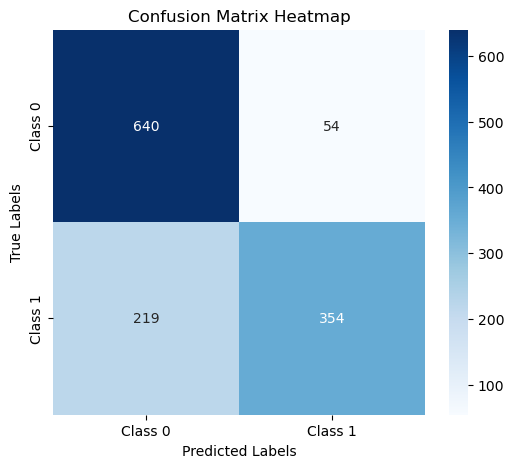

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 클래스 이름 정의
class_names = ['Class 0', 'Class 1']

# Heatmap 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


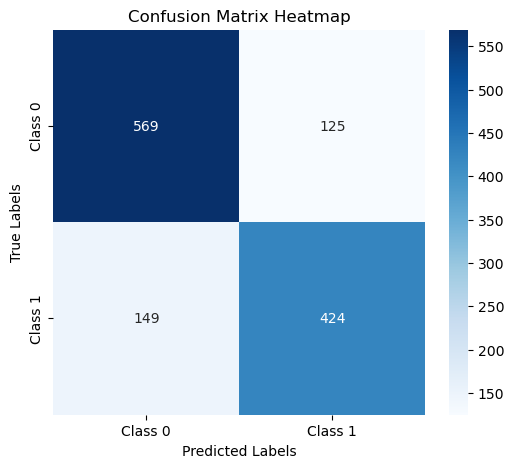

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 클래스 이름 정의
class_names = ['Class 0', 'Class 1']

# Heatmap 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_2nd, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [30]:
# 모델 훈련 후
model_2nd.save_checkpoint(model_dir="./Model/CYP2C19_Inhibitor")  # 원하는 경로 지정

In [21]:
model